In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_excel("Circle Risk_ [Analytics] Take Home Assignment Dataset.xlsx")

In [3]:
df.head()

,merchant,activity,create_date,amount,job_id
0,NeoCrypto,deposit,2020-01-01 05:24:00,1106.74,69e98239-9c94-3051-a72d-c0a45af23289
1,MusicDale,deposit,2020-01-01 05:37:00,23.85,b533175f-364e-390f-9b70-54ea4b236b4c
2,NeoCrypto,deposit,2020-01-01 06:06:00,975.45,589ca94a-d4dd-3cfd-9f87-f7df2c9fc56a
3,MusicDale,deposit,2020-01-01 06:07:00,29.43,4ef909d4-926c-3183-9af2-619f7df870d5
4,Crypwire,deposit,2020-01-01 07:04:00,479.38,481bb558-07a7-3afe-8b53-e5f1c876c5ee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12100 entries, 0 to 12099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   merchant     12100 non-null  object        
 1   activity     12100 non-null  object        
 2   create_date  12100 non-null  datetime64[ns]
 3   amount       12100 non-null  float64       
 4   job_id       12100 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 472.8+ KB


No null values.  Dates are already in datetime format.  Amount is the only numerical data.

In [5]:
df.describe()

,amount
count,12100.000000
mean,252.947902
std,429.172444
min,5.630000
25%,24.240000
50%,30.435000
75%,421.332500
max,3091.120000


Amount has a low mean with a high standard deviation.  Thus a strong positive skew in the dataset with majority of values being small and few larger values.  

In [6]:
df.drop('amount', axis=1).describe()

,merchant,activity,create_date,job_id
count,12100,12100,12100,12100
unique,6,2,11701,12100
top,MusicDale,deposit,2020-06-04 10:29:00,ec7da148-353e-3729-965d-8bb6d986c728
freq,6990,12063,3,1
first,NaN,NaN,2020-01-01 05:24:00,NaN
last,NaN,NaN,2020-06-30 23:45:00,NaN


Activity only has 2 unique categories and is thus a boolean classifier.  

The create_date ranges from january 1 2020 to june 30 2020.

In [7]:
df['activity'].value_counts()

deposit       12063
chargeback       37
Name: activity, dtype: int64

Very imbalanced dataset with only ~0.1% of data points belonging to the chargeback class.

In [8]:
chargeback_rate = df[df['activity'] == 'chargeback'].count()[0] / df.count()[0]
print('chargeback rate is {}'.format(chargeback_rate))
print('chargeback percentage is {}%'.format(chargeback_rate*100))

chargeback rate is 0.0030578512396694213
chargeback percentage is 0.30578512396694213%


The chargeback rate is 0.3% of all transactions.

In [9]:
chargeback_portion = df[df['activity'] == 'chargeback']['amount'].sum() / df['amount'].sum()
print('portion of funds requesting a chargedback is {}'.format(chargeback_portion))
print('percentage of funds requesting a chargedback is {}%'.format(chargeback_portion*100))

portion of funds requesting a chargedback is 0.008311106116706577
percentage of funds requesting a chargedback is 0.8311106116706577%


The portion of all funds that result in a chargeback is 0.8%.

Let us find out when chargebacks occured, separated by month.

In [10]:
df['month'] = df['create_date'].dt.month

In [11]:
monthly_chargebacks = []
monthly_chargeback_amount = []

for months in df['month'].unique():
    monthly_chargebacks.append(df[df['month'] == months].count()[0])
    monthly_chargeback_amount.append(df[df['month'] == months]['amount'].sum())

In [12]:
df_monthly_chargebacks = pd.DataFrame(list(df['month'].unique()), columns=['month'])
df_monthly_chargebacks['chargeback_count'] = monthly_chargebacks
df_monthly_chargebacks['chargeback_amount'] = monthly_chargeback_amount

In [13]:
df_monthly_chargebacks

,month,chargeback_count,chargeback_amount
0,1,1108,281444.55
1,2,1098,302903.03
2,3,1224,498533.79
3,4,1346,527281.43
4,6,4289,802131.49
5,5,3035,648375.33


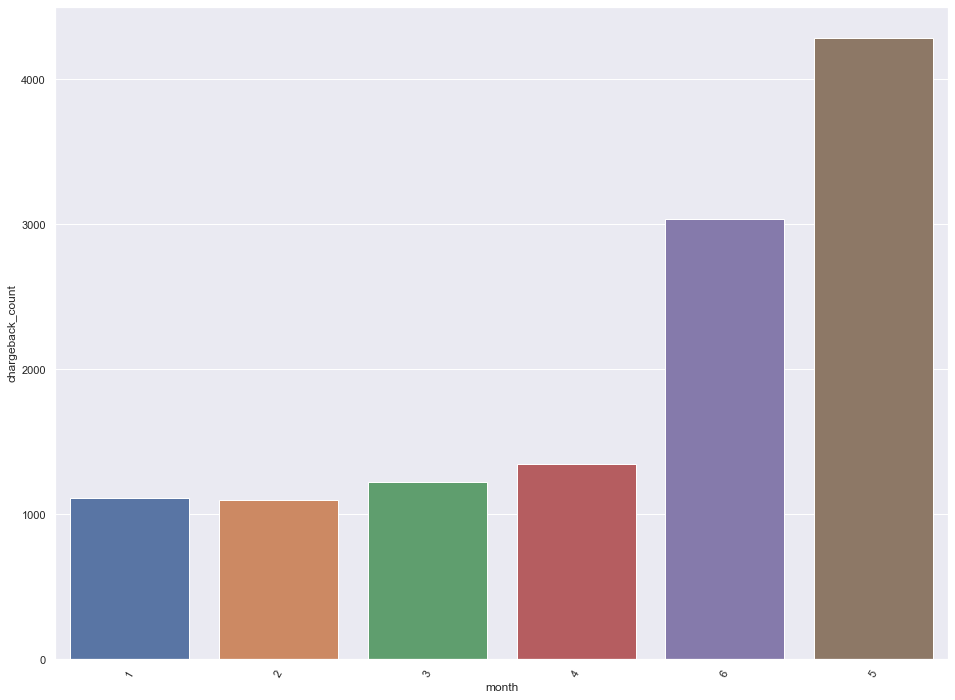

In [14]:
sns.set(rc={'figure.figsize':(16,12)})
g = sns.barplot(df_monthly_chargebacks['month'], df_monthly_chargebacks['chargeback_count'])
g.set_xticklabels(df_monthly_chargebacks['month'], rotation=60)
plt.show()

Chargebacks increase throughout the year up to May, then fall slightly in June.  This indicates that possibly fraudsters have identified a weakness in the system and are able to defraud more accounts, resulting in chargebacks when the client notices.  Perhaps the slight drop in june is due to measures taken to prevent this new form of fraud.  

I cannot think of any seasonal reason for chargebacks to increase in May, perhaps the end of the school year?

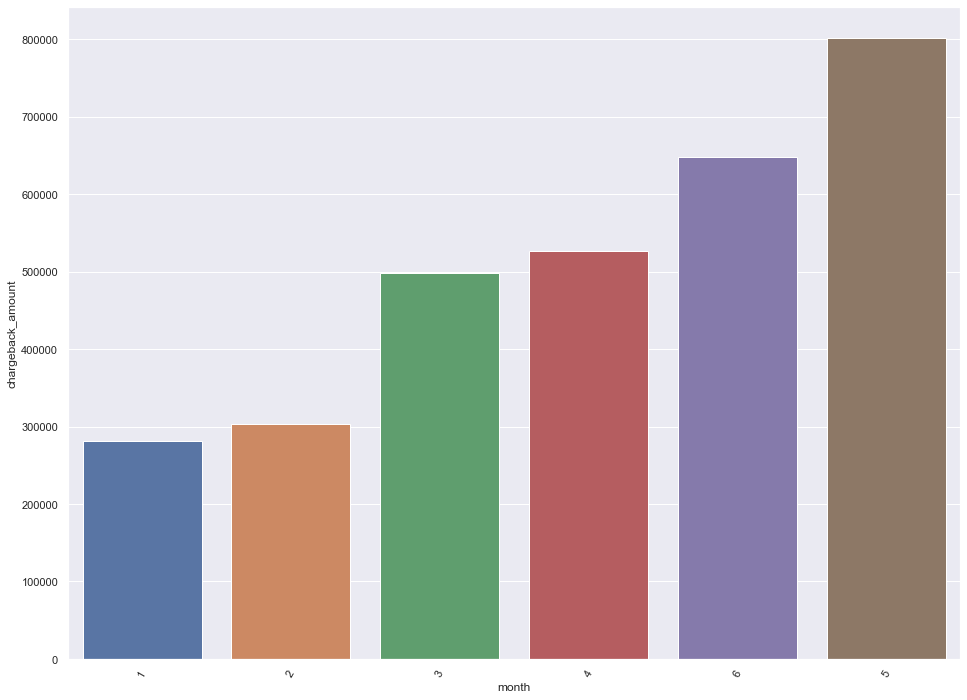

In [15]:
sns.set(rc={'figure.figsize':(16,12)})
g = sns.barplot(df_monthly_chargebacks['month'], df_monthly_chargebacks['chargeback_amount'])
g.set_xticklabels(df_monthly_chargebacks['month'], rotation=60)
plt.show()

It is also clear that the amount of funds requesting a chargeback is increaseing, though more steadily.  This suggests that fraudsters where increaseing the amounts they defrauded while testing their system, and then increased frequency.

Again we see the drop for June, suggesting measures are being taken to fight the fraud.  

I apologize for the x axis being out of order, if i had more time i would fix it.